In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
fr=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

Data Preparation

In [14]:
fr.info()
fr.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(150, 5)

In [15]:
fr.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
fr.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


EDA

In [17]:
fr.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


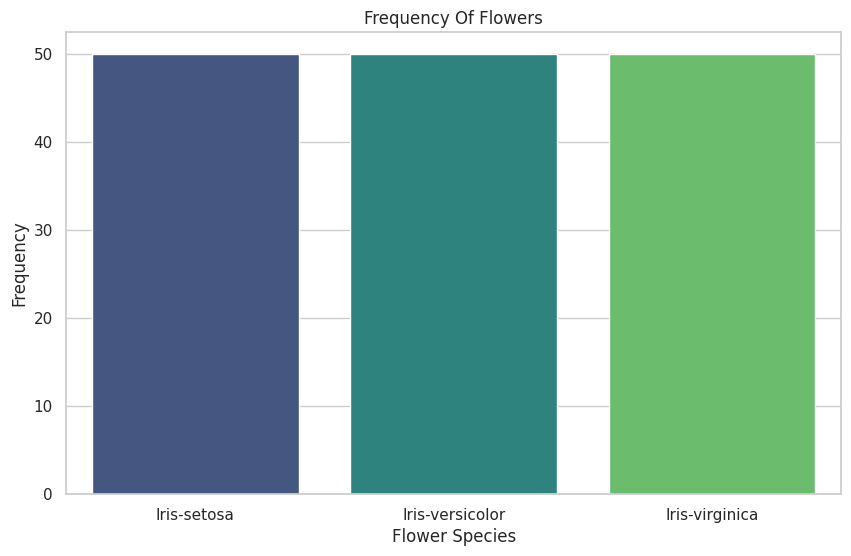

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x='species', data=fr, palette="viridis", order=fr['species'].value_counts().index)

plt.ylabel('Frequency')
plt.xlabel('Flower Species')
plt.title('Frequency Of Flowers')
plt.show()


Checking for multicolinarity

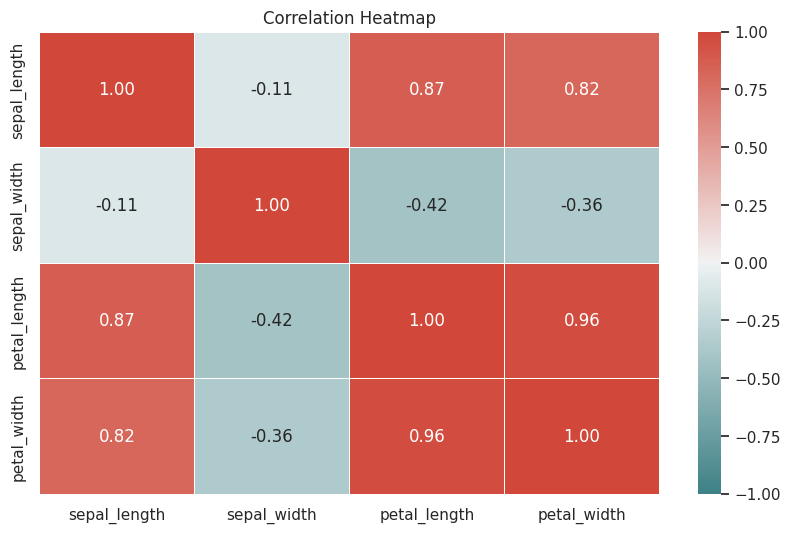

In [19]:
multicollinearity = fr.drop(columns='species').corr()

plt.figure(figsize=(10, 6))

cmap = sns.diverging_palette(200, 15, as_cmap=True)

sns.heatmap(multicollinearity, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, linewidths=.4)

plt.title('Correlation Heatmap')
plt.show()


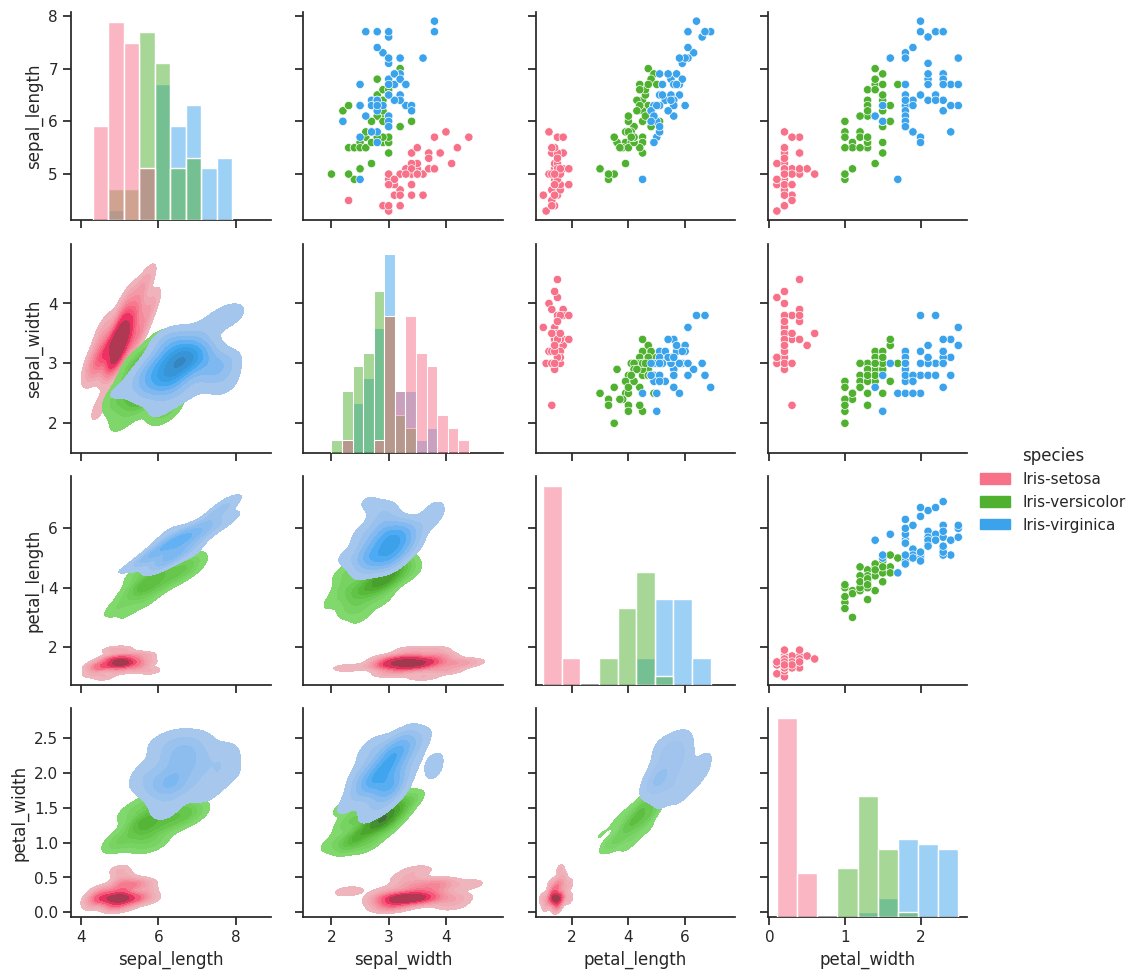

In [20]:
sns.set(style="ticks", palette="pastel")

# additional customization
plot = sns.PairGrid(fr, hue="species", palette="husl", diag_sharey=False)
plot.map_upper(sns.scatterplot)
plot.map_lower(sns.kdeplot, fill=True)
plot.map_diag(sns.histplot)
plot.add_legend()

# Show the plot
plt.show()


Model Buliding for iris 

In [21]:
target_column = 'species'
# Create features (X) and target variable (y)
X = fr.drop(columns=[target_column])
y = fr[target_column]


In [22]:
label_en = LabelEncoder()
y = label_en.fit_transform(y)

In [23]:
# Assuming 'X' and 'y' are your features and target variable
Splitter = ShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_index, test_index in Splitter.split(X):
    X_train = X.loc[train_index].copy()
    X_test = X.loc[test_index].copy()
    y_train = X.loc[train_index].copy()
    y_test = X.loc[test_index].copy()


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(120, 4)
(120, 4)
(30, 4)
(30, 4)


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state=1)

In [25]:
#classifier = RandomForestRegressor(random_state=42)

# Fit the model
#classifier.fit(X_train, y_train)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = knn.predict(X_test)


In [30]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9777777777777777


In [34]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9555555555555556
